<a href="https://colab.research.google.com/github/Seo-Jeong-Lee/tmp/blob/main/HW2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [9]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5047 - accuracy: 0.7794 - val_loss: 0.3749 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2880 - accuracy: 0.9058 - val_loss: 0.3349 - val_accuracy: 0.8595
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2118 - accuracy: 0.9320 - val_loss: 0.3036 - val_accuracy: 0.8764
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1698 - accuracy: 0.9456 - val_loss: 0.2769 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1362 - accuracy: 0.9565 - val_loss: 0.2832 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1121 - accuracy: 0.9652 - val_loss: 0.3299 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0916 - accuracy: 0.9737 - val_loss: 0.3196 - val_accuracy: 0.8832
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [17]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [19]:
#model2.compile()
model2.compile(optimizer="rmsprop",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

#model2.fit()
model2.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5012 - accuracy: 0.7821 - val_loss: 0.3640 - val_accuracy: 0.8740
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2910 - accuracy: 0.9059 - val_loss: 0.2945 - val_accuracy: 0.8911
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2097 - accuracy: 0.9321 - val_loss: 0.2798 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1676 - accuracy: 0.9449 - val_loss: 0.2770 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1387 - accuracy: 0.9526 - val_loss: 0.2865 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1077 - accuracy: 0.9675 - val_loss: 0.3265 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.3461 - val_accuracy: 0.8764
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

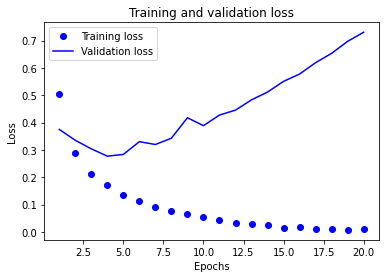

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6165 - accuracy: 0.6537 - val_loss: 0.4810 - val_accuracy: 0.8456
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4804 - accuracy: 0.7950 - val_loss: 0.3774 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3938 - accuracy: 0.8433 - val_loss: 0.3145 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3334 - accuracy: 0.8765 - val_loss: 0.2873 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2886 - accuracy: 0.8967 - val_loss: 0.2785 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2499 - accuracy: 0.9093 - val_loss: 0.2747 - val_accuracy: 0.8929
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2212 - accuracy: 0.9229 - val_loss: 0.2925 - val_accuracy: 0.8852
Epoch 8/20
30

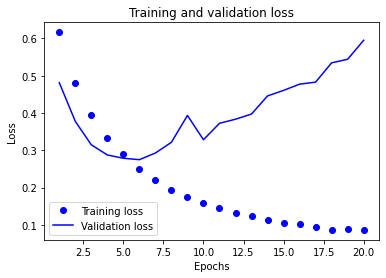

In [21]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history2 = model2_dr.fit(partial_x_train,
                         partial_y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_val,y_val))

import matplotlib.pyplot as plt
history2_dict = history2.history
loss_values = history2_dict["loss"]
val_loss_values = history2_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [24]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers
model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5789 - accuracy: 0.7695 - val_loss: 0.4820 - val_accuracy: 0.8373
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3632 - accuracy: 0.8968 - val_loss: 0.3531 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2719 - accuracy: 0.9255 - val_loss: 0.3378 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2262 - accuracy: 0.9406 - val_loss: 0.3203 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1839 - accuracy: 0.9575 - val_loss: 0.3275 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1604 - accuracy: 0.9635 - val_loss: 0.3385 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1407 - accuracy: 0.9699 - val_loss: 0.4570 - val_accuracy: 0.8536
Epoch 8/20
30

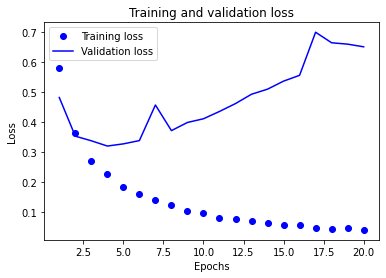

In [25]:
model2_dr.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history3 = model2_dr.fit(partial_x_train,
                         partial_y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_val,y_val))

import matplotlib.pyplot as plt
history3_dict = history3.history
loss_values = history3_dict["loss"]
val_loss_values = history3_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**1. The dropout model(model from Q2)에서의 minimum val_loss는 0.2747이고, epoch=6에서 나타난다.**  
**2. l1 regularization model에서의 minimum val_loss는 0.3203이고, epoch=4에서 나타난다.**  
**3. Overfitting을 방지하기 위한 l1 regularization model은 대신 original model보다도 낮은 performance를 수행할 수 있다. model fitting의 목적은 최소의 loss를 가진 model을 찾아내는 것이기 때문에 dropout model이 l1 regularization model보다 좀 더 나은 model이라고 판단할 수 있다.**  